In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [3]:
df = pd.read_csv('temp.csv')
df.head()

,Unnamed: 0,City_Name,Establishment_Type,Name,Rating,No_of_Reviews,Other_Ratings,Timings,Latitude,Longitude,...,Range_n_Cuisine,Address,Contact_No,Changed_Tag,Range_Cuisine_new,Cuisine,Cuisines,Meals,Special Diets,PRICE RANGE
0,3,Abbotsford,Restaurant,Townhall Public House Abbotsford,4.0,123,"{'Food': 3.5, 'Service': 4.0, 'Value': 3.5, 'A...","[{'days': 'Sun', 'times': ['10:00 AM - 12:00 A...",49.047710,-122.291150,...,"['$$ - $$$', 'Bar', 'Gastropub', 'Canadian']","33720 South Fraser Way, Abbotsford, British Co...",+1 604-746-2000,All reviews brunch fish chips salad pub fo...,"Bar,Gastropub,Canadian","Gastropub, Bar, Canadian","Gastropub, Bar, Canadian,Bar,Gastropub,Canadian",None,NaN,NaN
1,8,Abbotsford,Restaurant,White Spot,4.0,80,"{'Food': 4.5, 'Service': 4.5, 'Value': 4.0, 'A...",NaN,49.037080,-122.225850,...,"['$$ - $$$', 'Canadian', 'Vegetarian Friendly'...","36063 North Parallel Rd, Abbotsford, British C...",+1 604-864-5744,All reviews eggs bacon burger fries salad ...,"Canadian,Vegetarian,Friendly,Gluten,Free,Options",Canadian,"Canadian,Canadian,Vegetarian,Friendly,Gluten,F...","Breakfast, Lunch, Dinner, Brunch","Breakfast, Lunch, Dinner, Brunch",None
2,12,Abbotsford,Restaurant,Common Place Cafe,4.5,18,"{'Food': 4.5, 'Service': 4.0, 'Value': 4.0}","[{'days': 'Mon - Sat', 'times': ['7:00 AM - 4:...",49.044353,-122.281450,...,"['₹', 'Canadian', 'Vegetarian Friendly', 'Vega...","33933 Gladys Ave MCC Centre, Abbotsford, Briti...",+1 604-851-7737,All reviews borscht fair trade cottage chee...,"Canadian,Vegetarian,Friendly,Vegan,Options",Canadian,"Canadian,Canadian,Vegetarian,Friendly,Vegan,Op...","Breakfast, Lunch, Brunch","Breakfast, Lunch, Brunch",None
3,15,Abbotsford,Restaurant,Ricardo's Pizza,4.5,58,"{'Food': 4.0, 'Service': 4.0, 'Value': 4.0, 'A...","[{'days': 'Sun', 'times': ['11:00 AM - 10:00 P...",49.055172,-122.317184,...,"['$$ - $$$', 'Italian', 'Pizza', 'Canadian']","6-32750 George Ferguson Way, Abbotsford, Briti...",+1 604-859-1112,All reviews pizza pineapple ham salad bbq...,"Italian,Pizza,Canadian","Italian, Pizza, Canadian","Italian, Pizza, Canadian,Italian,Pizza,Canadian","Lunch, Dinner","Lunch, Dinner",None
4,18,Abbotsford,Restaurant,Keg Restaurant & Bar,4.0,199,"{'Food': 4.0, 'Service': 4.0, 'Value': 3.5, 'A...","[{'days': 'Sun - Sat', 'times': ['4:00 PM - 10...",49.041615,-122.277780,...,"['$$ - $$$', 'American', 'Steakhouse', 'Bar']","2142 West Railway St, Abbotsford, British Colu...",+1 604-855-9893,All reviews prime rib steak half lobster c...,"American,Steakhouse,Bar","Steakhouse, Bar, Canadian, American","Steakhouse, Bar, Canadian, American,American,S...","Dinner, After-hours","Dinner, After-hours",None


In [4]:
df.columns

Index(['Unnamed: 0', 'City_Name', 'Establishment_Type', 'Name', 'Rating',
       'No_of_Reviews', 'Other_Ratings', 'Timings', 'Latitude', 'Longitude',
       'Tags', 'Details', 'Rank', 'Range_n_Cuisine', 'Address', 'Contact_No',
       'Changed_Tag', 'Range_Cuisine_new', 'Cuisine', 'Cuisines', 'Meals',
       'Special Diets', 'PRICE RANGE'],
      dtype='object')

In [5]:
col_to_remove = ['Unnamed: 0', 'Contact_No', 'Address']
df = df.drop(columns=col_to_remove)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
city = df['City_Name'].values
city = le.fit_transform(city)

df['City_Name'] = city

In [8]:
type_ = df['Establishment_Type'].values
type_ = le.fit_transform(city)

df['Establishment_Type'] = type_

In [10]:
rev = df['No_of_Reviews']
rev = [locale.atoi(i) for i in rev]
df['No_of_Reviews'] = rev

In [16]:
import ast

ratings = df['Other_Ratings']
ratings[0]

new_rating = []

for rate in ratings:
    res = ast.literal_eval(rate)
    try:
        new_rating.append(sum(res.values())/len(res))
    except:
        new_rating.append(0)

In [17]:
df['Other_Ratings'] = new_rating

In [67]:
df2 = pd.read_csv('british_final3.csv')
df2

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (38,43) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Name,Rating,No_of_Reviews,Latitude,Longitude,Price,day_a,day_a1,time_a,...,After-hours.3,Breakfast.3,Brunch.3,Dinner.3,Drinks.3,Lunch.3,After-hours.4,Dinner.4,Drinks.4,Lunch.4
0,0,Freshii,3.5,9.0,49.036045,-122.293106,lowcost,1.0,5.0,7.0,...,0,0,0,0,0,0,0,0,0,0
1,1,Pantry Family Restaurant,4.0,10.0,49.049360,-122.312770,highcost,0.0,4.0,6.3,...,0,0,0,0,0,0,0,0,0,0
2,2,Townhall Public House Abbotsford,4.0,123.0,49.047710,-122.291150,highcost,0.0,NaN,10.0,...,0,0,0,0,0,0,0,0,0,0
3,3,Golden Dragon Restaurant,3.5,39.0,49.048800,-122.295150,highcost,0.0,1.0,11.3,...,0,0,0,0,0,0,0,0,0,0
4,4,Townline Taphouse & Grill,1.0,1.0,49.068900,-122.358580,not_available,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33277,33277,Mama Sita's Cafe,4.0,32.0,49.611073,-117.563180,highcost,0.0,6.0,7.0,...,0,0,1,0,0,0,0,0,0,0
33278,33278,Sleep is for Sissies,4.5,44.0,49.610270,-117.563780,highcost,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
33279,33279,Two Scoop Steve,4.5,27.0,49.080708,-116.103870,lowcost,0.0,4.0,10.0,...,0,0,0,0,0,0,0,0,0,0
33280,33280,Smoke'N'Jugz Roadhouse,4.5,19.0,49.085630,-116.089920,highcost,3.0,0.0,12.0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
cols = df2.columns
len(cols)

550

In [82]:
cols[:100]

Index(['Unnamed: 0', 'Name', 'Rating', 'No_of_Reviews', 'Latitude',
       'Longitude', 'Price', 'day_a', 'day_a1', 'time_a', 'time_a1', 'time_a2',
       'time_a3', 'day_b', 'day_b1', 'time_b', 'time_b1', 'time_b2', 'time_b3',
       'day_c', 'day_c1', 'time_c', 'time_c1', 'time_c2', 'time_c3', 'day_d',
       'day_d1', 'time_d', 'time_d1', 'time_d2', 'time_d3', 'day_e', 'day_e1',
       'time_e', 'time_e1', 'time_e2', 'time_e3', 'day_f', 'day_f1', 'time_f',
       'time_f1', 'City_encode', 'Est_code', 'Food', 'Service', 'Value',
       'Atmosphere', 'Afghani', 'African', 'American', 'Arabic', 'Asian',
       'Australian', 'Austrian', 'Bar', 'Barbecue', 'Beer restaurants',
       'Belgian', 'Brazilian', 'Brew Pub', 'British', 'Cafe', 'Cajun & Creole',
       'Canadian', 'Caribbean', 'Caucasian', 'Central European', 'Chinese',
       'Colombian', 'Contemporary', 'Czech', 'Deli', 'Diner', 'Dining bars',
       'Dutch', 'Eastern European', 'Ethiopian', 'European', 'Fast food',
       'Fr

In [70]:
df2['Rating']

0        3.5
1        4.0
2        4.0
3        3.5
4        1.0
        ... 
33277    4.0
33278    4.5
33279    4.5
33280    4.5
33281    4.0
Name: Rating, Length: 33282, dtype: float64

In [71]:
lat = df2['Latitude']
lon = df2['Longitude']

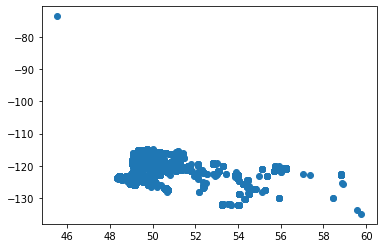

In [72]:
import matplotlib.pyplot as plt

plt.scatter(lat, lon)
plt.show()

In [74]:
for i in range(lon.shape[0]):
    if lon[i] > -80:
        print(i)

19095


In [76]:
df2.describe

<bound method NDFrame.describe of        Unnamed: 0                              Name  Rating  No_of_Reviews  \
0               0                           Freshii     3.5            9.0   
1               1          Pantry Family Restaurant     4.0           10.0   
2               2  Townhall Public House Abbotsford     4.0          123.0   
3               3          Golden Dragon Restaurant     3.5           39.0   
4               4         Townline Taphouse & Grill     1.0            1.0   
...           ...                               ...     ...            ...   
33277       33277                  Mama Sita's Cafe     4.0           32.0   
33278       33278              Sleep is for Sissies     4.5           44.0   
33279       33279                   Two Scoop Steve     4.5           27.0   
33280       33280            Smoke'N'Jugz Roadhouse     4.5           19.0   
33281       33281                   Woss Vegas Cafe     4.0            4.0   

        Latitude   Longitude 

In [87]:
y = df2['Rating'].values
y[:10]

array([3.5, 4. , 4. , 3.5, 1. , 3. , 4. , 4.5, 3.5, 3. ])

In [162]:
x = df2[['No_of_Reviews', 'Latitude', 'Longitude', 'Price', 'Est_code', 'Service', 'Value', 'Atmosphere']]

In [169]:
type(x)

pandas.core.frame.DataFrame

In [163]:
x.shape, y.shape

((33282, 8), (33282,))

In [164]:
def imp_df(column_names, importances):
    data = {
        'Feature': column_names,
        'Importance': importances,
    }
    df = pd.DataFrame(data) \
        .set_index('Feature') \
        .sort_values('Importance', ascending=False)

    return df


def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))


def drop_col_feat_imp(model, X_train, y_train, random_state=42):
    model_clone = clone(model)
    model_clone.random_state = random_state

    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)

    importances = []

    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis=1), y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis=1), y_train)
        importances.append(benchmark_score - drop_col_score)

    return imp_df(X_train.columns, importances)

In [165]:
from rfpimp import permutation_importances
from sklearn.base import clone
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [166]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=0)

In [170]:
type(X_train)

pandas.core.frame.DataFrame

In [171]:
rf = RandomForestRegressor(n_estimators=10).fit(X_train, y_train)
print('Random Forest Feature Importances:')
print(imp_df(x.columns, rf.feature_importances_))
print()

print('Permutation Feature Importance:')
#print(permutation_importances(rf, X_train, y_train, r2))
print()

print('Drop-Col Feature Importance:')
print(drop_col_feat_imp(rf, X_train, y_train))

Random Forest Feature Importances:
               Importance
Feature                  
Service          0.254763
Latitude         0.240592
Longitude        0.235122
No_of_Reviews    0.128520
Value            0.083210
Price            0.027023
Est_code         0.021607
Atmosphere       0.009164

Permutation Feature Importance:

Drop-Col Feature Importance:
               Importance
Feature                  
No_of_Reviews    0.015927
Longitude        0.005043
Latitude         0.004684
Price            0.001582
Value            0.001223
Service          0.001155
Atmosphere      -0.000228
Est_code        -0.002598


In [148]:
x[0]

array([   9.      ,   49.036045, -122.293106,    1.      ,    5.      ,
          4.5     ,    0.      ,    0.      ])

In [149]:
df2['Price']

0        1
1        0
2        0
3        0
4        3
        ..
33277    0
33278    0
33279    1
33280    0
33281    3
Name: Price, Length: 33282, dtype: int32

In [122]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

val = le.fit_transform(df2['Price'])
val

array([1, 0, 0, ..., 1, 0, 3])

In [124]:
df2['Price'] = val
df2['Price']

0        1
1        0
2        0
3        0
4        3
        ..
33277    0
33278    0
33279    1
33280    0
33281    3
Name: Price, Length: 33282, dtype: int32

In [154]:
df2['Price'] = df2['Price'].fillna(0)

In [177]:
X = x

In [183]:
X['score'] = (
    0.254763 * X['Service'] + 
    -1 * 0.240592 * X['Latitude'] + 
    -1 * 0.235122 * X['Longitude'] + 
    0.128520 * X['No_of_Reviews'] +
    0.083210 * X['Value'] + 
    0.027023 * X['Price'] + 
    0.021607 * X['Est_code'] + 
    0.009164 * X['Atmosphere']
)

<ipython-input-183-19a71f92f3e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['score'] = (


In [184]:
X.head()    

,No_of_Reviews,Latitude,Longitude,Price,Est_code,Service,Value,Atmosphere,score
0,9.0,49.036045,-122.293106,1,5,4.5,0.0,0.0,19.394291
1,10.0,49.049360,-122.312770,0,5,0.0,0.0,0.0,18.350774
2,123.0,49.047710,-122.291150,0,5,4.0,3.5,4.0,34.215791
3,39.0,49.048800,-122.295150,0,5,3.5,4.0,4.0,23.335013
4,1.0,49.068900,-122.358580,3,5,0.0,0.0,0.0,17.281233


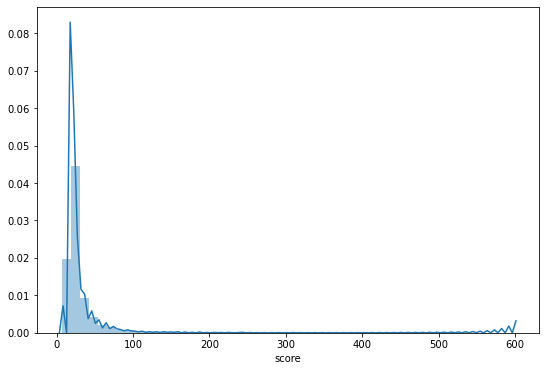

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9, 6))
sns.distplot(x['score'])
#plt.axvline(18000, color='r');

In [206]:
x['score']

0        19.394291
1        18.350774
2        34.215791
3        23.335013
4        17.281233
           ...    
33277    21.278230
33278    22.862042
33279    20.743506
33280    19.683859
33281    18.387485
Name: score, Length: 33282, dtype: float64

In [226]:
df2.iloc[1]

Unnamed: 0                               1
Name              Pantry Family Restaurant
Rating                                   4
No_of_Reviews                           10
Latitude                           49.0494
                            ...           
 Lunch.3                                 0
 After-hours.4                           0
 Dinner.4                                0
 Drinks.4                                0
 Lunch.4                                 0
Name: 1, Length: 550, dtype: object

In [225]:
df2.iloc[33281]

Unnamed: 0                  33281
Name              Woss Vegas Cafe
Rating                          4
No_of_Reviews                   4
Latitude                  50.2131
                       ...       
 Lunch.3                        0
 After-hours.4                  0
 Dinner.4                       0
 Drinks.4                       0
 Lunch.4                        0
Name: 33281, Length: 550, dtype: object

In [222]:
df2.iloc[0][40:45]

time_f1         NaN
City_encode       3
Est_code          5
Food            4.0
Service         4.5
Name: 0, dtype: object

In [221]:
df2.iloc[33280][40:45]

time_f1         NaN
City_encode     303
Est_code          5
Food            4.5
Service           5
Name: 33280, dtype: object